# Phenotype densities per Regions 

In [3]:
from queries import*
from utilities import*
from scipy.spatial import Delaunay
from numpy import linalg
from sklearn import preprocessing
import copy

## Extracting Tissue densities per regions : for all slides

In [7]:
Directory = os.getcwd()
Directory_path = Directory + '/data/output'
files = os.listdir(Directory_path)


region_count = pd.DataFrame({})

for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition == ''
        
    
    if condition == 'DEEPMEL':
        
        
        print('Treating patient' + PATIENT_ID)

        ### The border values will extract only the border degined in the edge_neighberhood
        
        OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID +'/'

        nodes = pd.read_csv(OUTPUT_PATH+'nodes_with_border.csv')
        nodes['region'] = nodes.apply(lambda x : regions(x.tissue_category, x.on_border), axis =1)
        nodes_grouped   = nodes.groupby(['region']).agg('count')['cell_id'].reset_index().rename(columns = {'cell_id':'count'})
        nodes_grouped_pivotted = pd.pivot_table(nodes_grouped, values='count', index=[],columns=['region'], aggfunc=np.sum).reset_index()
        nodes_grouped_pivotted.columns.name = None
        nodes_grouped_pivotted = nodes_grouped_pivotted.drop(['index'], axis=1)
        nodes_grouped_pivotted = nodes_grouped_pivotted.fillna(0)
        nodes_grouped_pivotted['name'] = PATIENT_ID
        
        region_count = pd.concat([region_count,nodes_grouped_pivotted])
        
        
        


Treating patient2P1
Treating patient3I1
Treating patient1F1
Treating patient1L1
Treating patient3C1
Treating patient2U2
Treating patient2Z1
Treating patient3J1
Treating patient2S1
Treating patient1J2
Treating patient1E1
Treating patient1O1
Treating patient2Y1
Treating patient2K1
Treating patient2A1
Treating patient1W1
Treating patient1X2
Treating patient2H1
Treating patient1X3
Treating patient2B1
Treating patient2L1
Treating patient1P1
Treating patient2O1
Treating patient1Y1
Treating patient1V2
Treating patient1S1
Treating patient2E1
Treating patient2W1
Treating patient3N1
Treating patient3D1
Treating patient1K1
Treating patient3M1
Treating patient2T1
Treating patient3G1
Treating patient1C1
Treating patient2U1
Treating patient3F1
Treating patient1O2
Treating patient2V1
Treating patient3E1
Treating patient3J2
Treating patient1J1
Treating patient1X1
Treating patient1R1
Treating patient2D1
Treating patient2B2
Treating patient2K3
Treating patient2G1
Treating patient3P1
Treating patient2C1


In [11]:
region_count = region_count.drop_duplicates(['name'])

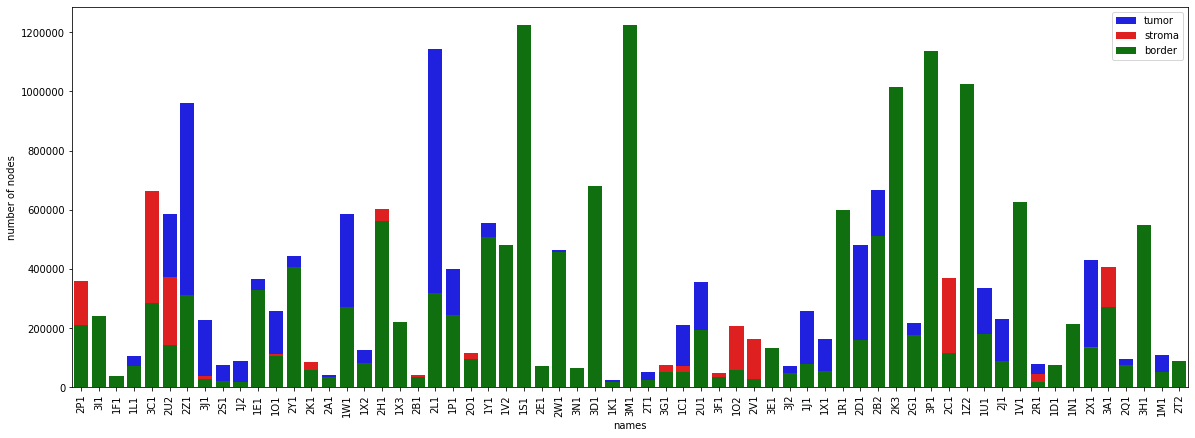

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [20]:
ax = plt.subplots(figsize = (20,7))
  
# plotting columns
ax = sns.barplot(x=region_count["name"], y=region_count["tumor"], color='b',label='tumor')
ax = sns.barplot(x=region_count["name"], y=region_count["stroma"], color='r',label='stroma')
ax = sns.barplot(x=region_count["name"], y=region_count["border"], color='g',label= 'border')

# renaming the axes
ax.set(xlabel="names", ylabel="number of nodes")
plt.legend()  
plt.xticks(rotation=90)
# visulaizing illustration
plt.show()
ax.savefig(Directory + '/plots/region_cardinality.png')

In [ ]:
ax = plt.subplots()
  
# plotting columns
ax = sns.barplot(x=df["X"], y=df["Y"], color='b')
ax = sns.barplot(x=df["X"], y=df["Z"], color='r')
  
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
  
# visulaizing illustration
plt.show()

In [6]:
region_count

,border,missing,stroma,tumor,name
0,210968,669,360590,40734,2P1
0,239345,55442,220990,110935,3I1


## Extracting Phenotype densities per regions : for all slides

In [4]:
Directory = os.getcwd()
Directory_path = Directory + '/data/output'
files = os.listdir(Directory_path)


region_phneo_count = pd.DataFrame({})

for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition == ''
        
    
    if condition == 'DEEPMEL':
        
        
        print('Treating patient' + PATIENT_ID)

        ### The border values will extract only the border degined in the edge_neighberhood
        
        OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID +'/'

        nodes = pd.read_csv(OUTPUT_PATH+'nodes_with_border.csv')
        n = len(nodes)
        nodes['region'] = nodes.apply(lambda x : regions(x.tissue_category, x.on_border), axis =1)
        nodes_grouped = nodes.groupby(['region','phenotype']).agg('count')['cell_id'].reset_index().rename(columns = {'cell_id':'count'})
        nodes_grouped['region_phenotype'] = nodes_grouped.apply(lambda row: row.region + '_region_' + row.phenotype , axis = 1)
        nodes_grouped['count'] = nodes_grouped['count']/n
        nodes_grouped_pivotted = pd.pivot_table(nodes_grouped, values='count', index=[],columns=['region_phenotype'], aggfunc=np.sum).reset_index()
        nodes_grouped_pivotted.columns.name = None
        nodes_grouped_pivotted = nodes_grouped_pivotted.drop(['index'], axis=1)
        nodes_grouped_pivotted = nodes_grouped_pivotted.fillna(0)
        nodes_grouped_pivotted['name'] = PATIENT_ID
        
        region_phneo_count = pd.concat([region_phneo_count,nodes_grouped_pivotted])


Treating patient3P1
Treating patient3F1
Treating patient1L1
Treating patient3M1
Treating patient1K1
Treating patient1R1
Treating patient2A1
Treating patient1D1
Treating patient1Z2
Treating patient3I1
Treating patient1Y1
Treating patient2C1
Treating patient3E1
Treating patient3A1
Treating patient2T1
Treating patient3J1
Treating patient1V2
Treating patient3N1
Treating patient3G1
Treating patient2K3
Treating patient1S1
Treating patient2U1
Treating patient1O2
Treating patient2T2
Treating patient2B1
Treating patient2P1
Treating patient1C1
Treating patient2L1
Treating patient1P1
Treating patient1X1
Treating patient2O1
Treating patient1U1
Treating patient2H1
Treating patient1X3
Treating patient1J2
Treating patient3D1
Treating patient1E1
Treating patient3J2
Treating patient1W1
Treating patient1J1
Treating patient2V1
Treating patient2V1
Treating patient2Y1
Treating patient1F1
Treating patient2G1
Treating patient2R1
Treating patient1M1
Treating patient2K1
Treating patient2Z1
Treating patient1V1


In [33]:
region_phneo_count = region_phneo_count.fillna(0)
region_phneo_count.head(3)

,name,border_region_dendtritic,stroma_region_dendtritic,tumor_region_dendtritic,border_region_B,border_region_DP1,border_region_DP2,border_region_T,border_region_macrophages,border_region_stroma,...,stroma_region_stroma,stroma_region_tumor,tumor_region_B,tumor_region_DP1,tumor_region_DP2,tumor_region_NK,tumor_region_T,tumor_region_macrophages,tumor_region_stroma,tumor_region_tumor
0,3P1,0.0,0.0,0.0,0.006188,0.000495,0.001114,0.134793,0.016875,0.164879,...,0.046960,0.000181,0.000054,0.000147,0.000079,0.000744,0.004107,0.003087,0.031315,0.249410
0,3F1,0.0,0.0,0.0,0.004923,0.000193,0.000086,0.030569,0.004344,0.215782,...,0.358661,0.000107,0.000043,0.000139,0.000000,0.000386,0.001309,0.000386,0.020111,0.088059
0,1L1,0.0,0.0,0.0,0.001998,0.000011,0.002676,0.026594,0.013636,0.116697,...,0.102235,0.000008,0.000268,0.000023,0.000501,0.000354,0.003019,0.007512,0.075437,0.304501


In [25]:
columns = list(region_phneo_count.columns[29:]) + list(region_phneo_count.columns[:29])

In [26]:
region_phneo_count = region_phneo_count[columns]

In [27]:
region_phneo_count = region_phneo_count.drop_duplicates(['name'])

In [31]:
for column in region_phneo_count.columns[1:]:
    region = column.split('_')[0]
    phenotype = column.split('_')[2]
    if (region == 'missing') or (phenotype == 'MISSING') :
        region_phneo_count = region_phneo_count.drop([column], axis=1)

In [32]:
region_phneo_count.to_csv('./data/input/region_phneo_count.csv', index = False)

## Answering Alex question: 
After CHUV doctor provided us with a sublist of responders and progressors, we explored the difference in dendritic-T edge count between the two groups.

In [41]:
PATIENT_ID = '2O1'
INPUT_PATH = './data/input/DEEPMEL_' + PATIENT_ID + '/'
PLOT_PATH ='./plots/DEEPMEL_' + PATIENT_ID +'/'
OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID +'/'

In [42]:
graph_edges = pd.read_csv(OUTPUT_PATH+'graph_edges.csv')

In [43]:
graph_edges.head()

,distance,cell_id_1,cell_id_2,tissue_category_1,tissue_category_2,phenotype_1,phenotype_2,threshold,is_border
0,7.762087,116965,116975,stroma,stroma,T,stroma,17.460,False
1,4.579301,163013,163024,stroma,stroma,T,T,16.275,False
2,12.149486,160688,160725,tumor,stroma,stroma,stroma,18.645,True
3,14.975313,174810,174821,stroma,stroma,stroma,stroma,18.645,False
4,18.222239,145790,145799,stroma,stroma,stroma,stroma,18.645,False


In [44]:
graph_edges.phenotype_1.unique()

array(['T', 'stroma', 'tumor', 'macrophages', 'MISSING', 'DP2',
       'dendtritic', 'B', 'DP1'], dtype=object)

In [45]:
graph_edges = graph_edges[graph_edges['phenotype_1'].apply(lambda x: x in ['T','dendtritic'])]
graph_edges = graph_edges[graph_edges['phenotype_2'].apply(lambda x: x in ['T','dendtritic'])]
graph_edges = graph_edges[graph_edges['phenotype_1'] != graph_edges['phenotype_2']]


In [46]:
graph_edges.head()

,distance,cell_id_1,cell_id_2,tissue_category_1,tissue_category_2,phenotype_1,phenotype_2,threshold,is_border
715,5.400000,179330,179371,stroma,stroma,dendtritic,T,17.90625,False
2874,9.192388,179325,179330,stroma,stroma,T,dendtritic,17.90625,False
3937,11.925183,179734,179745,stroma,stroma,T,dendtritic,17.90625,False
5765,11.950732,179330,179398,stroma,stroma,dendtritic,T,17.90625,False
6220,16.829141,177385,177426,stroma,stroma,T,dendtritic,17.90625,True


In [47]:
graph_edges['region_1'] = graph_edges.apply(lambda x : regions(x.tissue_category_1, x.is_border), axis =1)
graph_edges['region_2'] = graph_edges.apply(lambda x : regions(x.tissue_category_2, x.is_border), axis =1)

In [48]:
graph_edges_grouped = graph_edges.groupby(['tissue_category_1','tissue_category_2']).agg('count')[['distance']].rename(columns = {'distance':'count'}).reset_index()


In [49]:
graph_edges_grouped['edge_tissue']  = graph_edges_grouped.apply(lambda x : x.tissue_category_1 +'_'+ x.tissue_category_2 , axis =1)

In [50]:
graph_edges_grouped = graph_edges_grouped[['edge_tissue','count']]

In [51]:
graph_edges_pivotted = pd.pivot_table(graph_edges_grouped, values='count', index=[],columns=['edge_tissue'], aggfunc=np.sum).reset_index()
graph_edges_pivotted.columns.name = None


In [52]:
graph_edges_pivotted['stroma_tumor_1'] = graph_edges_pivotted.apply(lambda x: x.stroma_tumor + x.tumor_stroma, axis=1 )

In [53]:
graph_edges_pivotted = graph_edges_pivotted.drop(['stroma_tumor','tumor_stroma'],axis=1).rename(columns={'stroma_tumor_1':'stroma_tumor'})

In [54]:
graph_edges_pivotted

,index,stroma_stroma,tumor_tumor,stroma_tumor
0,count,1759,14,25


In [55]:
responders  = ['1Y1','1N1','1J1','2Y1','1C1','1O1','1P1','3H1','3M1','3D1','1R1','2X1']
progressors = ['2K1','2O1','2D1','3J1','3I1','2U1','2S1','2T1','2E1','2L1','2Q1','3J2','3E1']
all_patients = responders + progressors

In [40]:
TC_DC = pd.DataFrame({})
for patient in all_patients:
    
    if patient in responders:
        label = 'resp'
    else:
        label = 'prog'
        
    print(patient +' : '+ label)

    OUTPUT_PATH = './data/output/DEEPMEL_' + patient +'/'
    graph_edges = pd.read_csv(OUTPUT_PATH+'graph_edges.csv')
    
    graph_edges = graph_edges[graph_edges['phenotype_1'].apply(lambda x: x in ['T','dendtritic'])]
    graph_edges = graph_edges[graph_edges['phenotype_2'].apply(lambda x: x in ['T','dendtritic'])]
    graph_edges = graph_edges[graph_edges['phenotype_1'] != graph_edges['phenotype_2']]
    print(len(graph_edges))
    
    if len(graph_edges) == 0 :
        graph_edges_pivotted = pd.DataFrame(columns = ['name','label'])
        graph_edges_pivotted.append({'name':patient,'label':label},ignore_index=True)
        
    else :
        # We will not use it in our case
        #graph_edges['region_1'] = graph_edges.apply(lambda x : regions(x.tissue_category_1, x.is_border), axis =1)
        #graph_edges['region_2'] = graph_edges.apply(lambda x : regions(x.tissue_category_2, x.is_border), axis =1)
    
        graph_edges_grouped = graph_edges.groupby(['tissue_category_1','tissue_category_2']).agg('count')[['distance']].rename(columns = {'distance':'count'}).reset_index()
        graph_edges_grouped['edge_tissue']  = graph_edges_grouped.apply(lambda x : x.tissue_category_1 +'_'+ x.tissue_category_2 , axis =1)
    
        graph_edges_grouped = graph_edges_grouped[['edge_tissue','count']]
    
        graph_edges_pivotted = pd.pivot_table(graph_edges_grouped, values='count', index=[],columns=['edge_tissue'], aggfunc=np.sum).reset_index()
        graph_edges_pivotted.columns.name = None
    
        graph_edges_pivotted['stroma_tumor_1'] = graph_edges_pivotted.apply(lambda x: x.stroma_tumor + x.tumor_stroma, axis=1 )
    
        graph_edges_pivotted = graph_edges_pivotted.drop(['stroma_tumor','tumor_stroma','index'],axis=1).rename(columns={'stroma_tumor_1':'stroma_tumor'})
        graph_edges_pivotted['name'] = patient
        graph_edges_pivotted['label'] = label
        
        
    TC_DC = pd.concat([TC_DC,graph_edges_pivotted])
    


1Y1 : resp
50309
1N1 : resp
4696
1J1 : resp
2168
2Y1 : resp
5766
1C1 : resp
15870
1O1 : resp
3983
1P1 : resp
4945
3H1 : resp
120381
3M1 : resp
94439
3D1 : resp
1616
1R1 : resp
125401
2X1 : resp
2948
2K1 : prog
235


AttributeError: 'Series' object has no attribute 'stroma_tumor'

In [90]:
TC_DC

,name,label,stroma_stroma,tumor_tumor,stroma_tumor
0,1J1,resp,2108.0,14.0,46.0
0,1C1,resp,15842.0,6.0,22.0
